In [188]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prophet as pt
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('default')
%matplotlib inline
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
yf.pdr_override()

In [189]:
stock_symbol = ["MSFT", "AAPL", "GOOG", "META"]
start_date = "2013-10-01" 
end_date = "2023-09-30"  

In [190]:
for stock in stock_symbol:
    globals()[stock] = yf.download(stock, start_date, end_date)
    

company_list = [MSFT, AAPL, GOOG, META]
company_name = ["MICROSOFT", "APPLE", "GOOGLE", "FACEBOOK"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-18,298.190002,303.600006,297.799988,302.549988,302.549988,14234200,FACEBOOK
2023-09-19,302.480011,306.170013,299.809998,305.070007,305.070007,15924400,FACEBOOK
2023-09-20,305.049988,308.059998,299.429993,299.670013,299.670013,19379500,FACEBOOK
2023-09-21,295.700012,300.260010,293.269989,295.730011,295.730011,21300500,FACEBOOK
2023-09-22,299.299988,305.380005,298.269989,299.079987,299.079987,25351400,FACEBOOK
2023-09-25,295.640015,300.950012,293.700012,300.829987,300.829987,18987000,FACEBOOK
2023-09-26,297.660004,300.299988,296.010010,298.959991,298.959991,19417200,FACEBOOK
2023-09-27,300.450012,301.299988,286.790009,297.739990,297.739990,36429800,FACEBOOK
2023-09-28,298.940002,306.329987,296.700012,303.959991,303.959991,22167100,FACEBOOK


In [191]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,73.695689,74.509822,72.924325,73.748615,71.850722,1.432806e+08
std,54.220917,54.867696,53.610429,54.260830,54.772129,8.876123e+07
min,17.087500,17.307142,17.081429,17.176430,14.990741,3.145820e+07
25%,28.997499,29.205000,28.730000,28.955000,26.436962,8.418310e+07
50%,46.450001,46.832500,46.145000,46.465000,44.483955,1.159644e+08
75%,128.949997,130.600006,127.410004,129.610001,127.817589,1.771516e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.065523e+09


In [192]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2013-10-01 to 2023-09-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Adj Close     2517 non-null   float64
 5   Volume        2517 non-null   int64  
 6   company_name  2517 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 157.3+ KB


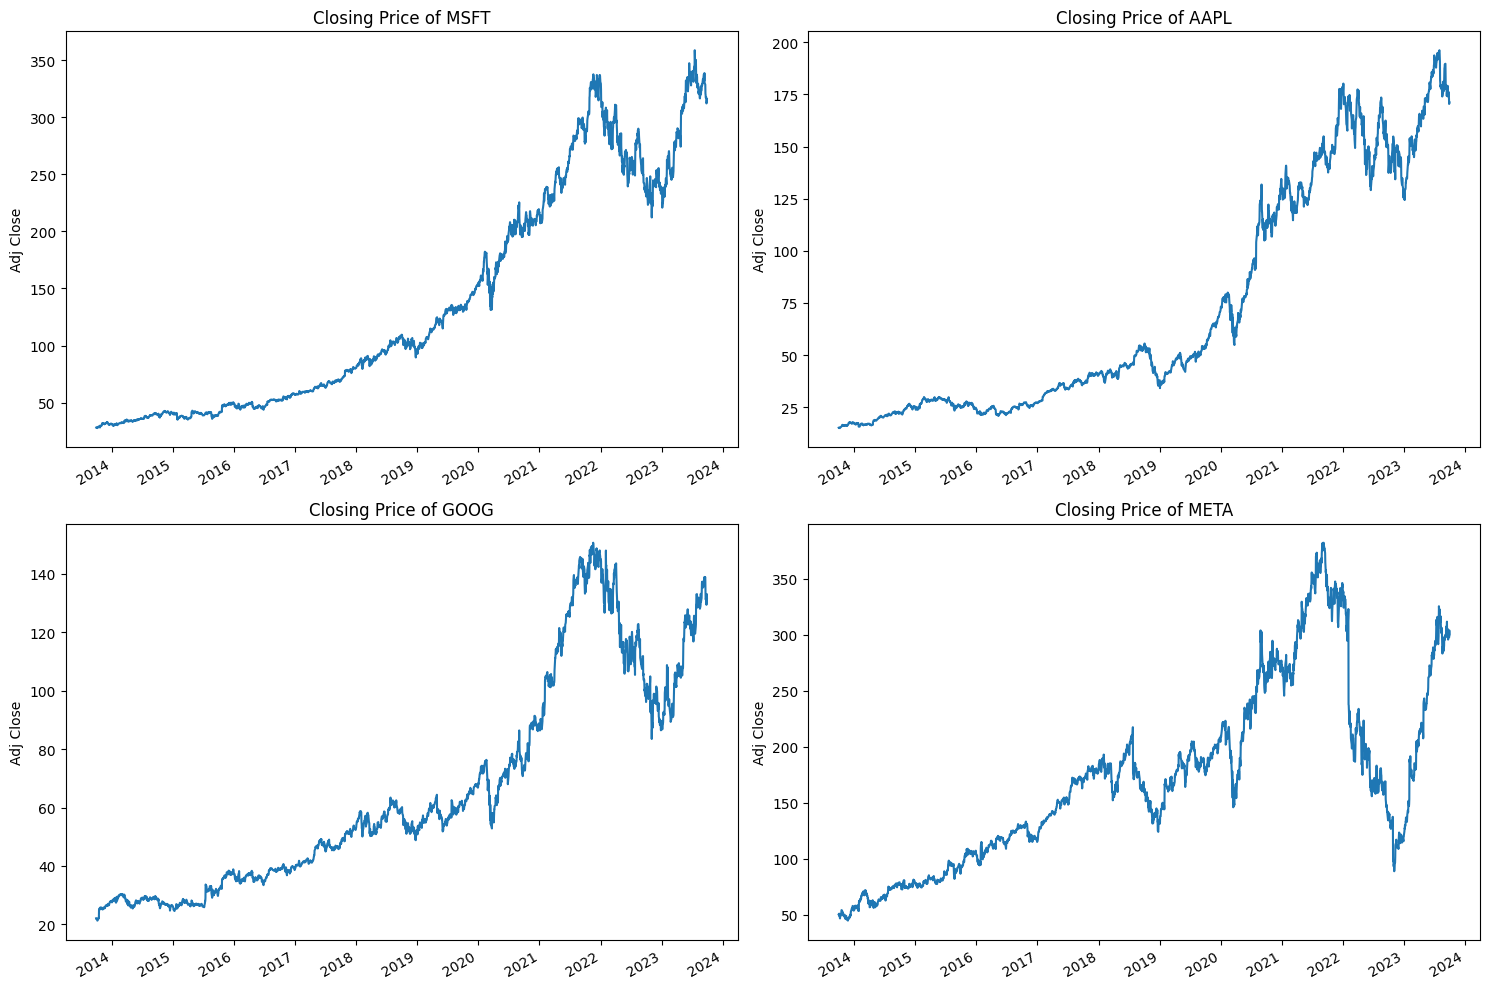

In [193]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_symbol[i - 1]}")
    
plt.tight_layout()

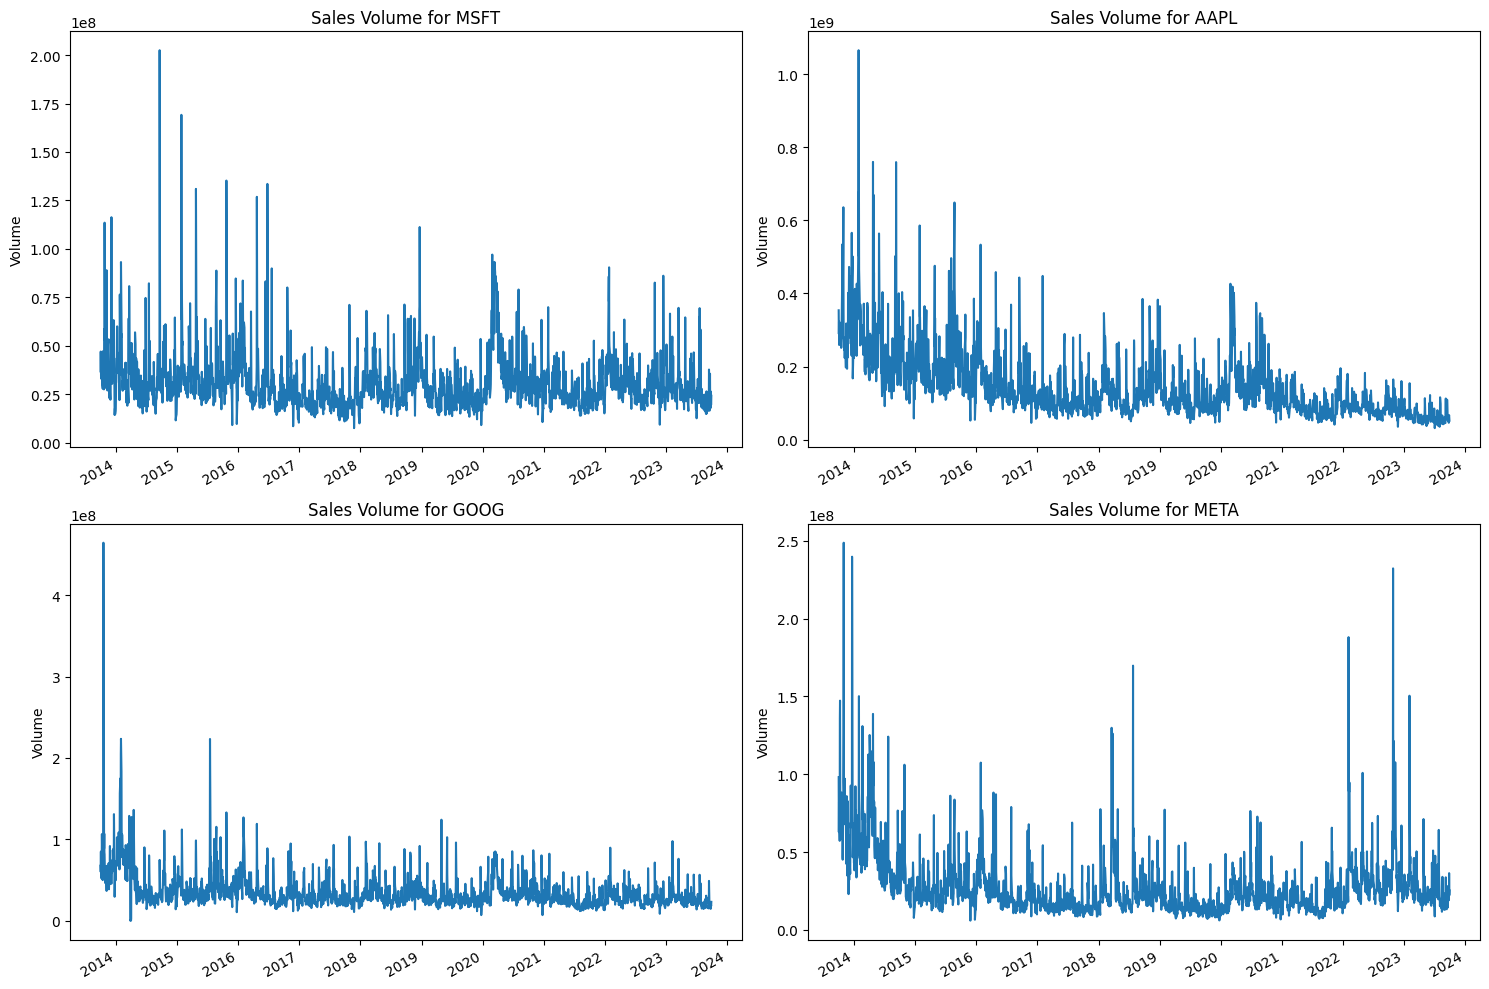

In [194]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_symbol[i - 1]}")
    
plt.tight_layout()

In [195]:
df = pdr.get_data_yahoo('AAPL', start_date, end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,17.087500,17.469286,17.084999,17.427143,15.209558,353883600
2013-10-02,17.343929,17.564285,17.276787,17.484285,15.259429,289184000
2013-10-03,17.518213,17.583929,17.169287,17.264643,15.067734,322753200
2013-10-04,17.280714,17.307142,17.092857,17.251072,15.055888,258868400
2013-10-07,17.377144,17.594643,17.333929,17.419643,15.203013,312292400
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


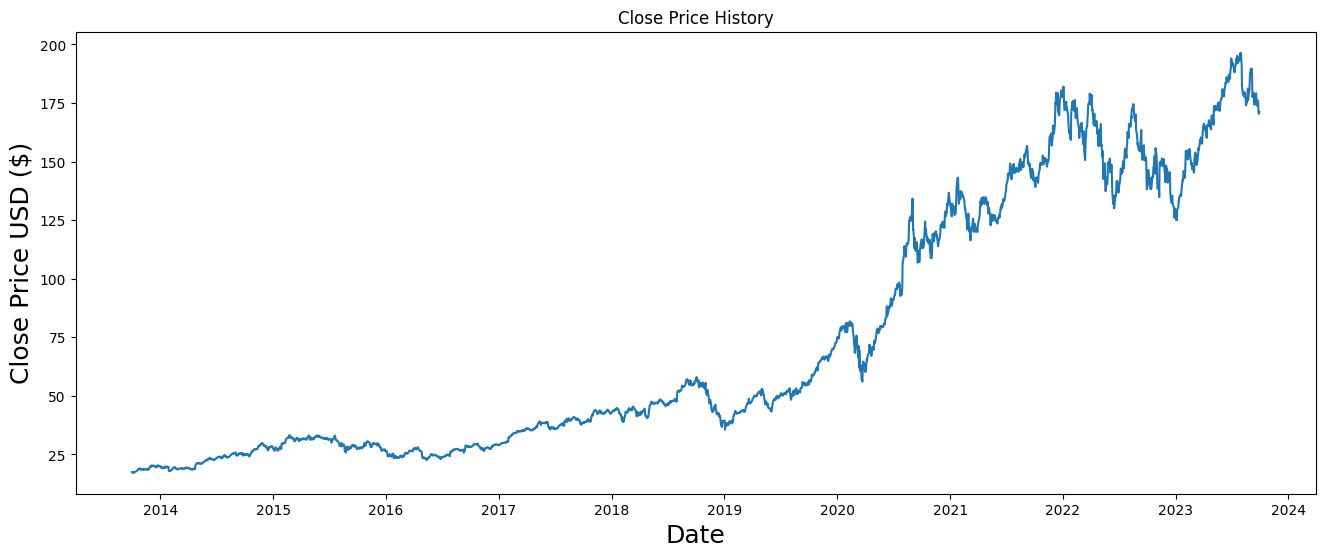

In [196]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [197]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2392

In [198]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.39849590e-03],
       [1.71723925e-03],
       [4.92057855e-04],
       ...,
       [8.54858668e-01],
       [8.56309020e-01],
       [8.59209639e-01]])

In [199]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0013985 , 0.00171724, 0.00049206, 0.00041636, 0.00135666,
       0.        , 0.00112557, 0.00173318, 0.00236469, 0.00300816,
       0.00353409, 0.00401819, 0.00469354, 0.0055681 , 0.00805234,
       0.0077555 , 0.00876951, 0.01015407, 0.00896873, 0.00974966,
       0.00711999, 0.00875756, 0.00831928, 0.00778737, 0.00912611,
       0.00886713, 0.00796468, 0.00628527, 0.00789296, 0.00759214,
       0.0077834 , 0.00790691, 0.00940701, 0.00877549, 0.00750847,
       0.00769175, 0.00678531, 0.0080085 , 0.00774155, 0.00852647,
       0.0104509 , 0.01295306, 0.01496715, 0.01400294, 0.01700911,
       0.01674615, 0.01732388, 0.01575404, 0.01703103, 0.01685571,
       0.01602099, 0.01585764, 0.01464043, 0.01525202, 0.01475199,
       0.01391129, 0.01265424, 0.01356266, 0.01776016, 0.01727806])]
[0.01652701142173431]

[array([0.0013985 , 0.00171724, 0.00049206, 0.00041636, 0.00135666,
       0.        , 0.00112557, 0.00173318, 0.00236469, 0.00300816,
       0.00353409, 0.00401819, 0.00

In [200]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 97s 40ms/step - loss: 0.0012


In [201]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 38ms/step


4.445312874099267

C:\Users\lehun\AppData\Local\Temp\ipykernel_6108\3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


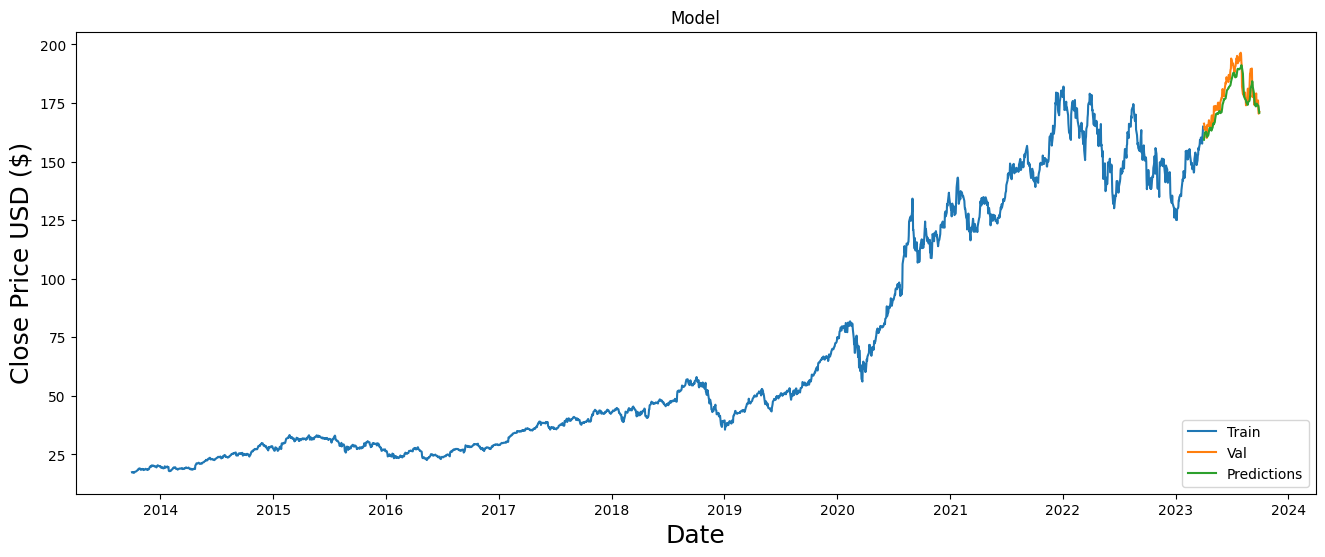

In [202]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [203]:
valid

,Close,Predictions
Date,,
2023-04-03,166.169998,159.296616
2023-04-04,165.630005,160.759811
2023-04-05,163.759995,161.937210
2023-04-06,164.660004,162.415924
2023-04-10,162.029999,162.661804
...,...,...
2023-09-25,176.080002,173.900970
2023-09-26,171.960007,173.757187
2023-09-27,170.429993,172.987320
